# Курсовой проект

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [4]:
TRAIN_DATASET_PATH = 'train.csv' # y_train, y_valid
TEST_DATASET_PATH = 'test.csv'

### Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [5]:
train_df = pd.read_csv('train.csv', index_col= False)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [6]:
test_df = pd.read_csv('test.csv', index_col= False)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [7]:
train_df.shape[1]-1 == test_df.shape[1]

True

### Приведение типов

In [8]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [9]:
train_df.dtypes.value_counts()

int64      9
float64    8
object     3
dtype: int64

In [10]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

### Обзор данных

**Целевая переменная**

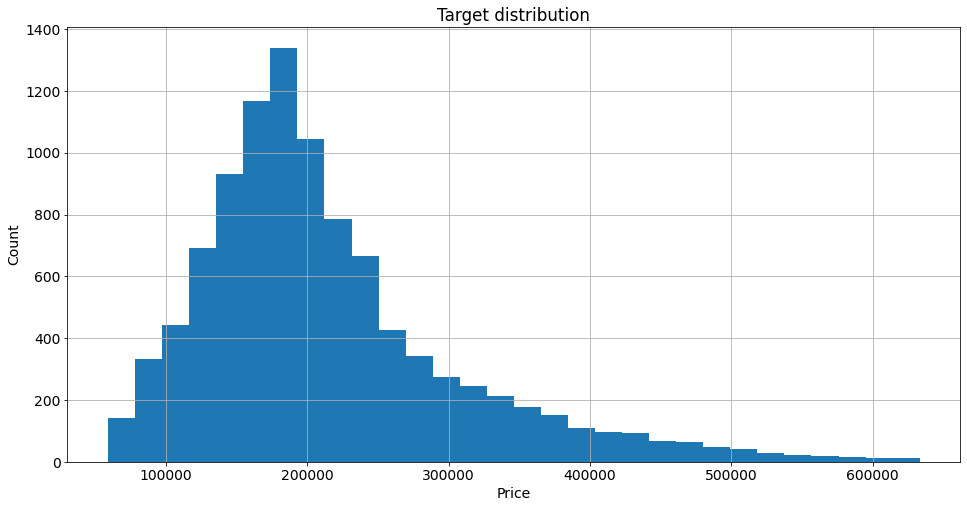

In [11]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

**Количественные переменные**

In [12]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


**Категориальные переменные**

In [13]:
cat_colnames = train_df.select_dtypes(include='object').columns.tolist()
cat_colnames

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [14]:
for cat_colname in cat_colnames[2:]:
    print(str(cat_colname) + '\n\n' + str(train_df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Ecology_2

B    9903
A      97
Name: Ecology_2, dtype: int64
****************************************************************************************************

Ecology_3

B    9725
A     275
Name: Ecology_3, dtype: int64
****************************************************************************************************

Shops_2

B    9175
A     825
Name: Shops_2, dtype: int64
****************************************************************************************************



### Обработка выбросов

**Rooms**

In [15]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [16]:
train_df.loc[train_df['Rooms'].isin([0, 10, 19]), 'Rooms'] = train_df['Rooms'].median()

In [17]:
train_df['Rooms'].value_counts()

2.0    3891
1.0    3705
3.0    2235
4.0     150
5.0      18
6.0       1
Name: Rooms, dtype: int64

**Square, LifeSquare, KitchenSquare**

In [18]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.888800,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.812096,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,1.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,6.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [19]:
train_df = train_df[train_df['Square'].isnull() |
                    (train_df['Square'] < train_df['Square'].quantile(.99)) &
                    (train_df['Square'] > train_df['Square'].quantile(.01))]

train_df = train_df[train_df['LifeSquare'].isnull() |
                    (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.99)) &
                    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.01))]

train_df = train_df[train_df['KitchenSquare'].isnull() |
                    (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.99)) &
                    (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.01))]

In [20]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,8881.000000,8881.000000,7296.000000,8881.000000,8881.000000,8881.000000,8.881000e+03,8881.000000,8881.000000,8881.000000,8881.000000,4799.000000,8881.000000,8881.000000,8881.000000
mean,1.884585,54.809487,34.830304,6.075329,8.446684,12.826934,4.242532e+03,0.119620,26.071163,5630.480014,8.403783,1156.072932,1.392636,4.438577,214939.479049
std,0.797003,16.225349,14.280535,3.503611,5.133763,6.369206,2.127571e+05,0.119654,17.269698,3977.902810,24.295214,1032.814421,1.492092,4.837340,89654.209673
min,1.000000,29.719934,2.941437,1.000000,1.000000,0.000000,1.914000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.637555,22.863805,1.000000,4.000000,9.000000,1.972000e+03,0.017647,10.000000,2370.000000,0.000000,325.000000,0.000000,1.000000,156934.440088
50%,2.000000,51.656012,32.459931,6.000000,7.000000,14.000000,1.977000e+03,0.075779,25.000000,5562.000000,2.000000,990.000000,1.000000,3.000000,194240.534503
75%,2.000000,64.720916,44.119769,9.000000,12.000000,17.000000,2.000000e+03,0.194489,36.000000,7614.000000,5.000000,1548.000000,3.000000,6.000000,250381.580780
max,6.000000,117.855969,88.381356,14.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [21]:
mask = train_df["Square"] < train_df["KitchenSquare"] + train_df["LifeSquare"]
train_df.loc[mask].describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,250.000000,652.000000,652.000000,652.000000
mean,1.648773,53.937687,53.975295,4.766871,9.946319,14.760736,2000.834356,0.107157,16.115031,3707.608896,9.110429,889.080000,0.878834,3.461656,190942.451129
std,0.735922,14.718972,14.697441,4.290268,5.805755,8.616302,19.706764,0.109550,16.929164,3944.012120,29.387084,723.285122,1.344859,5.290638,85871.143763
min,1.000000,29.719934,22.892380,1.000000,1.000000,0.000000,1918.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59877.592523
25%,1.000000,41.318307,41.593619,1.000000,5.000000,10.000000,1977.000000,0.011654,2.000000,629.000000,0.000000,540.000000,0.000000,0.000000,132108.091249
50%,1.000000,51.306312,50.900047,1.000000,9.000000,17.000000,2015.000000,0.072158,6.000000,1564.000000,1.000000,705.000000,0.000000,1.000000,171791.694650
75%,2.000000,64.653077,64.342662,10.000000,14.000000,17.000000,2017.000000,0.195781,26.000000,6138.000000,4.000000,1046.000000,2.000000,5.000000,228633.695836
max,5.000000,89.118209,88.381356,14.000000,28.000000,117.000000,2020.000000,0.486246,74.000000,19083.000000,141.000000,4508.000000,6.000000,23.000000,573539.701956


In [22]:
train_df.loc[train_df['LifeSquare'] < 8, 'LifeSquare'] = 8

In [23]:
train_df.loc[train_df['KitchenSquare'] < 5, 'KitchenSquare'] = 5

**HouseFloor, Floor**

In [24]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  32.,  37.,
        39.,  40.,  44.,  45.,  48.,  99., 117.])

In [25]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 42],
      dtype=int64)

In [26]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()
train_df['HouseFloor'].sort_values().unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  32.,  37.,  39.,
        40.,  44.,  45.,  48.,  99., 117.])

In [27]:
floor_outliers = train_df[train_df['Floor'] > train_df['HouseFloor']].index
print(len(floor_outliers))

train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

1404


**HouseYear**

In [28]:
train_df['HouseYear'].value_counts().tail()


4968    1
1932    1
1914    1
1916    1
1928    1
Name: HouseYear, dtype: int64

In [29]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [30]:
train_df['HouseYear'].value_counts().tail()

1914    1
1947    1
1932    1
1916    1
1928    1
Name: HouseYear, dtype: int64

### Обработка пропусков

In [31]:
len(train_df) - train_df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1585
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4082
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [32]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(20)

,Square,LifeSquare,KitchenSquare
0,47.981561,29.442751,6.0
1,65.683640,40.049543,8.0
3,53.352981,52.731512,9.0
4,39.649192,23.776169,7.0
5,80.384479,46.683720,12.0
6,62.254114,37.160377,7.0
8,64.511437,NaN,5.0
9,46.461409,18.915552,8.0
10,46.304907,27.922584,6.0
11,68.808859,45.736906,7.0


**LifeSquare**

In [33]:
train_df['LifeSquare'].median()

32.4599308684466

In [34]:
square_med_diff = (train_df.loc[train_df['LifeSquare'].notnull(), 'Square'] -\
                   train_df.loc[train_df['LifeSquare'].notnull(), 'LifeSquare'] -\
                   train_df.loc[train_df['LifeSquare'].notnull(), 'KitchenSquare']).median()

square_med_diff

11.481428697739837

In [35]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] =\
train_df.loc[train_df['LifeSquare'].isnull(), 'Square'] -\
train_df.loc[train_df['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff

In [36]:
train_df['LifeSquare'].median()

33.16649135152288

**Healthcare_1**

In [37]:
train_df['Healthcare_1'].head()

0       NaN
1     240.0
3    1084.0
4    2078.0
5     990.0
Name: Healthcare_1, dtype: float64

In [38]:
train_df['Healthcare_1'].tail()

9995    350.0
9996      NaN
9997      NaN
9998    325.0
9999     30.0
Name: Healthcare_1, dtype: float64

In [39]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()

In [40]:
train_df['Healthcare_1'].head()

0     990.0
1     240.0
3    1084.0
4    2078.0
5     990.0
Name: Healthcare_1, dtype: float64

In [41]:
train_df['Healthcare_1'].tail()

9995    350.0
9996    990.0
9997    990.0
9998    325.0
9999     30.0
Name: Healthcare_1, dtype: float64

### Построение новых признаков

**Dummies**

***Заменим буквы в категориальных признаках на числа***

In [42]:
train_df["Ecology_2"]

0       B
1       B
3       B
4       B
5       B
       ..
9995    B
9996    B
9997    B
9998    B
9999    B
Name: Ecology_2, Length: 8881, dtype: object

In [43]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

In [44]:
train_df["Ecology_2_bin"]

0       1
1       1
3       1
4       1
5       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Ecology_2_bin, Length: 8881, dtype: int64

**DistrictSize, IsDistrictLarge**

In [45]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

# VC ~ размерность датасета

# VC(train + test)
# VC(normalize=True)
# VC(train).to_dict() -> train.map(dict), test.map(dict)
district_size.head()

,DistrictId,DistrictSize
0,27,628
1,1,537
2,23,449
3,6,396
4,9,279


In [46]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,990.0,0,11,B,184966.930730,1,1,1,20
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,240.0,1,16,B,300009.450063,1,1,1,86
2,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,1,1,1,146
3,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,1,1,1,95
4,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,...,4,990.0,0,6,B,215898.447742,1,1,1,54


In [47]:
(train_df['DistrictSize'] > 100).value_counts()

False    4938
True     3943
Name: DistrictSize, dtype: int64

In [48]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,990.0,0,11,B,184966.930730,1,1,1,20,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,240.0,1,16,B,300009.450063,1,1,1,86,0
2,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,1084.0,0,5,B,175616.227217,1,1,1,146,1
3,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2078.0,2,4,B,150226.531644,1,1,1,95,0
4,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,...,990.0,0,6,B,215898.447742,1,1,1,54,0


**MedPriceByDistrict**

In [49]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,147258.736617
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146154.352249
4,1,2.0,202944.331497


In [50]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,11,B,184966.930730,1,1,1,20,0,203384.328026
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,16,B,300009.450063,1,1,1,86,0,300009.450063
2,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,5,B,175616.227217,1,1,1,146,1,169246.115943
3,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2,4,B,150226.531644,1,1,1,95,0,158791.017955
4,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,...,0,6,B,215898.447742,1,1,1,54,0,384517.540046


In [51]:
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [52]:
test_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  5000 non-null   int64  
 1   DistrictId          5000 non-null   object 
 2   Rooms               5000 non-null   float64
 3   Square              5000 non-null   float64
 4   LifeSquare          3959 non-null   float64
 5   KitchenSquare       5000 non-null   float64
 6   Floor               5000 non-null   int64  
 7   HouseFloor          5000 non-null   float64
 8   HouseYear           5000 non-null   int64  
 9   Ecology_1           5000 non-null   float64
 10  Ecology_2           5000 non-null   object 
 11  Ecology_3           5000 non-null   object 
 12  Social_1            5000 non-null   int64  
 13  Social_2            5000 non-null   int64  
 14  Social_3            5000 non-null   int64  
 15  Healthcare_1        2623 non-null   float64
 16  Helthc

In [53]:
train_df.Ecology_2

0       B
1       B
2       B
3       B
4       B
       ..
8876    B
8877    B
8878    B
8879    B
8880    B
Name: Ecology_2, Length: 8881, dtype: object

In [54]:
train_df.Ecology_3

0       B
1       B
2       B
3       B
4       B
       ..
8876    B
8877    B
8878    B
8879    A
8880    B
Name: Ecology_3, Length: 8881, dtype: object

In [55]:
train_df["Eco2_Eco3"] = train_df.Ecology_2 + train_df.Ecology_3
train_df.groupby(["Floor"])["Rooms"].mean()

Floor
1     1.811125
2     1.919225
3     1.916570
4     1.959255
5     1.895054
6     1.883415
7     1.936688
8     1.878333
9     1.915730
10    1.804408
11    1.811966
12    1.766067
13    1.848057
14    1.899642
15    1.875556
16    1.846154
17    1.902174
18    1.982456
19    1.826923
20    1.833333
21    1.750000
22    2.076923
23    2.000000
24    1.840000
25    2.272727
28    1.500000
31    1.000000
32    1.000000
33    1.000000
42    2.000000
Name: Rooms, dtype: float64

In [56]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict,Eco2_Eco3
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,11,B,184966.930730,1,1,1,20,0,203384.328026,BB
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,16,B,300009.450063,1,1,1,86,0,300009.450063,BB
2,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,5,B,175616.227217,1,1,1,146,1,169246.115943,BB
3,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,4,B,150226.531644,1,1,1,95,0,158791.017955,BB
4,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,...,6,B,215898.447742,1,1,1,54,0,384517.540046,BB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,77,32,2.0,50.401785,30.476203,5.0,4,5.0,1968,0.135650,...,11,B,196684.316040,1,1,1,33,0,233599.115975,BB
8877,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,...,5,A,189050.289571,1,1,0,51,0,171162.179903,BB
8878,5123,27,1.0,47.939008,31.457579,5.0,12,16.0,2015,0.072158,...,0,A,159143.805370,1,1,0,628,1,121091.843464,BB
8879,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,...,5,B,181595.339808,1,0,1,65,0,187966.419078,BA


In [57]:
gp = train_df.Ecology_2 + train_df.Ecology_3
gp.value_counts()

BB    8525
BA     267
AB      89
dtype: int64

In [58]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'Eco2_Eco3']

In [59]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'Eco2_Eco3']

In [60]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin']

new_feature_names = ['IsDistrictLarge', 'MedPriceByDistrict']

target_name = 'Price'

In [61]:
train_df.shape

(8881, 27)

In [62]:
test_df.shape

(5000, 19)

### Разбиение выборки на тренировочную и тестовую

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
train_df["Rooms_vc"] = train_df["Rooms"].map(train_df["Rooms"].value_counts().to_dict())

In [65]:
new_feature_names.remove("IsDistrictLarge")

In [66]:
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=45)

### Исследование различных алгоритмов машинного обучения для предсказания значения целевой переменной Price

In [68]:
def evaluate_preds(train_true_values, train_pred_values, val_true_values, val_pred_values):
    """
    Функция для оценки работы модели
    Parameters:
    train_true_values - целевая переменная из тренировочной части датасета
    train_pred_values - предсказания модели по тренировочной части
    val_true_values - целевая переменная из валидационной части датасета
    val_pred_values - предсказания модели по валидационной части
    Returns:
    R2 на тренировочной и валидационной части, 
    графики зависимости истинных значений от предсказаний
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2(val_true_values, val_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=val_pred_values, y=val_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    plt.show()

#### Линейная регрессия

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [70]:
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score as r2

Train R2:	0.703
Valid R2:	0.699


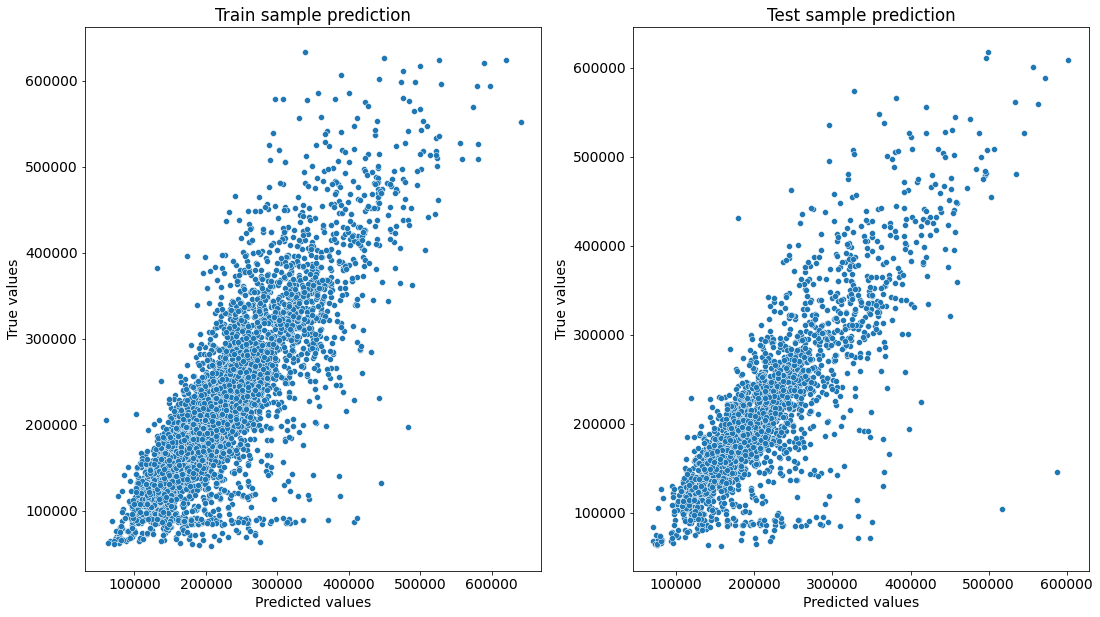

In [71]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [72]:
cv_score = cross_val_score(lr, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=45))
cv_score

array([0.68983805, 0.71420294, 0.71083933, 0.707819  , 0.67727285])


#### Гребневая регрессия

In [73]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.0001).fit(X_train, y_train)

In [74]:
y_pred_train = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

Train R2:	0.703
Valid R2:	0.699


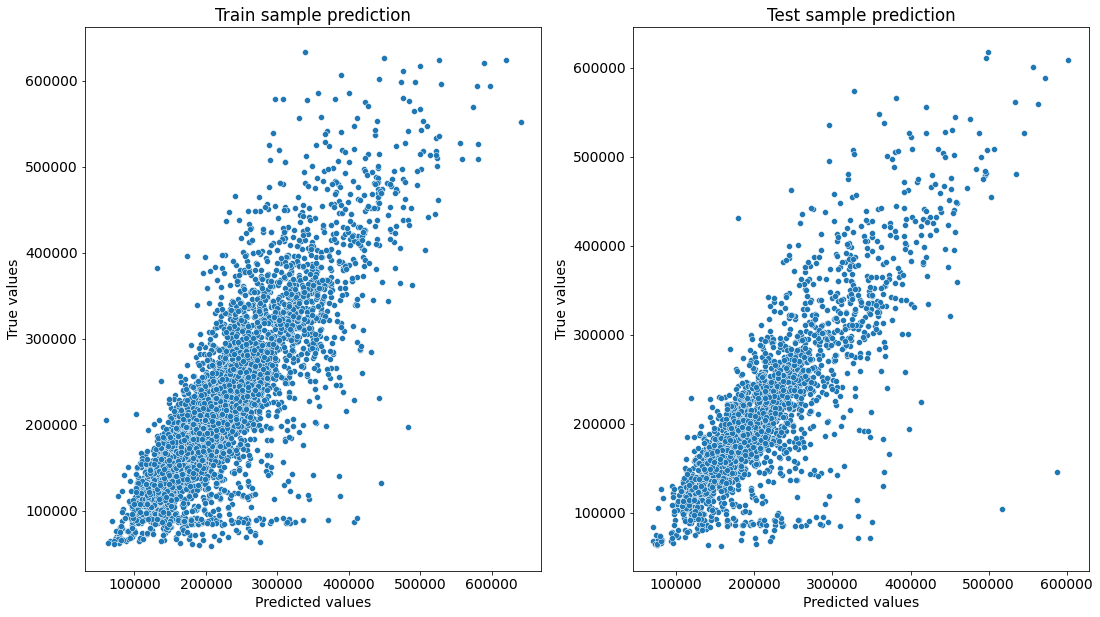

In [75]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [76]:
cv_score = cross_val_score(lr, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=45))
cv_score

array([0.68983805, 0.71420294, 0.71083933, 0.707819  , 0.67727285])

### Лассо

In [77]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1, max_iter=500).fit(X_train, y_train)

In [78]:
y_pred_train = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

Train R2:	0.703
Valid R2:	0.699


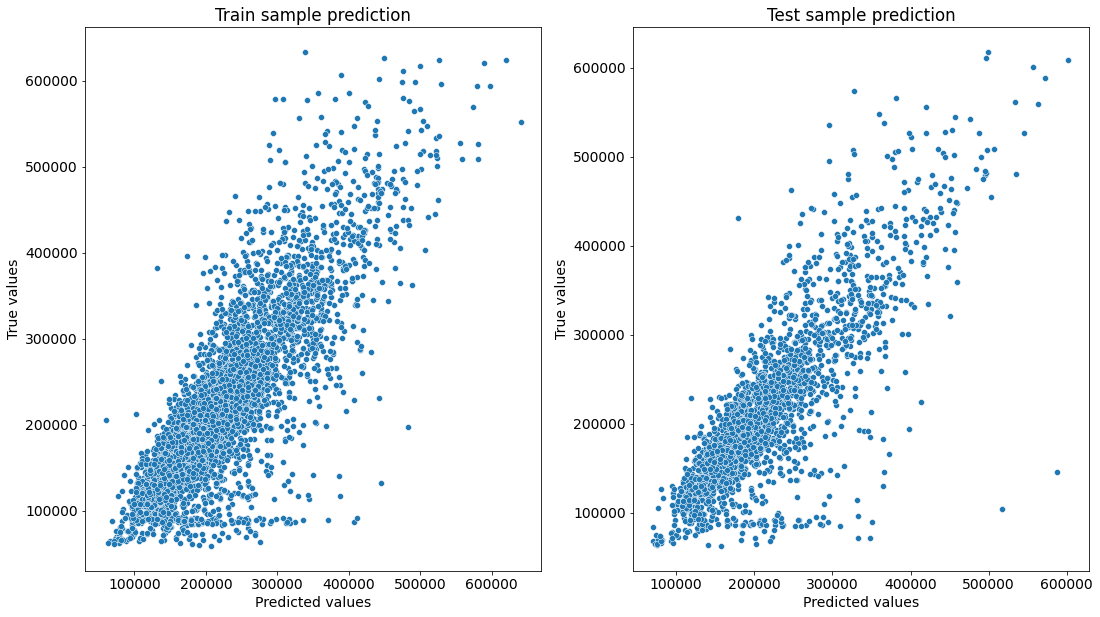

In [79]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [80]:
cv_score = cross_val_score(lasso, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=45))
cv_score

array([0.68984624, 0.71420621, 0.71083962, 0.70781096, 0.67727373])

### Регрессия k ближайших соседей

In [81]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

In [82]:
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

Train R2:	0.821
Valid R2:	0.632


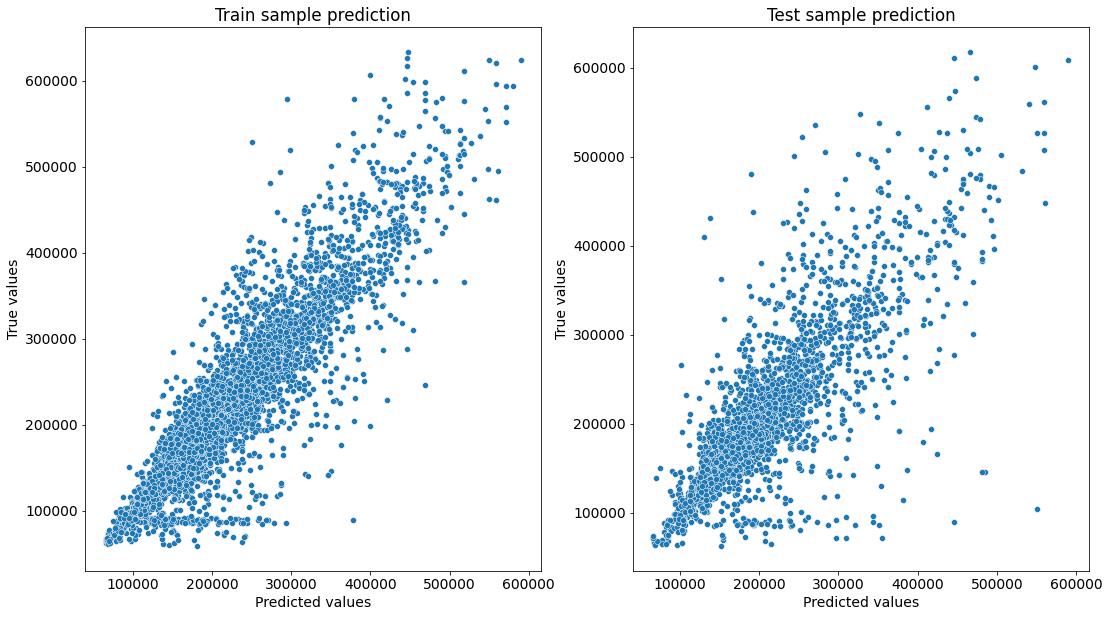

In [83]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [84]:
cv_score = cross_val_score(reg, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=45))
cv_score

array([0.62811123, 0.66216925, 0.64652721, 0.63440783, 0.590294  ])

### Случайный лес

In [85]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42).fit(X_train, y_train)

In [86]:
y_pred_train = regr.predict(X_train)
y_pred = regr.predict(X_test)

Train R2:	0.87
Valid R2:	0.72


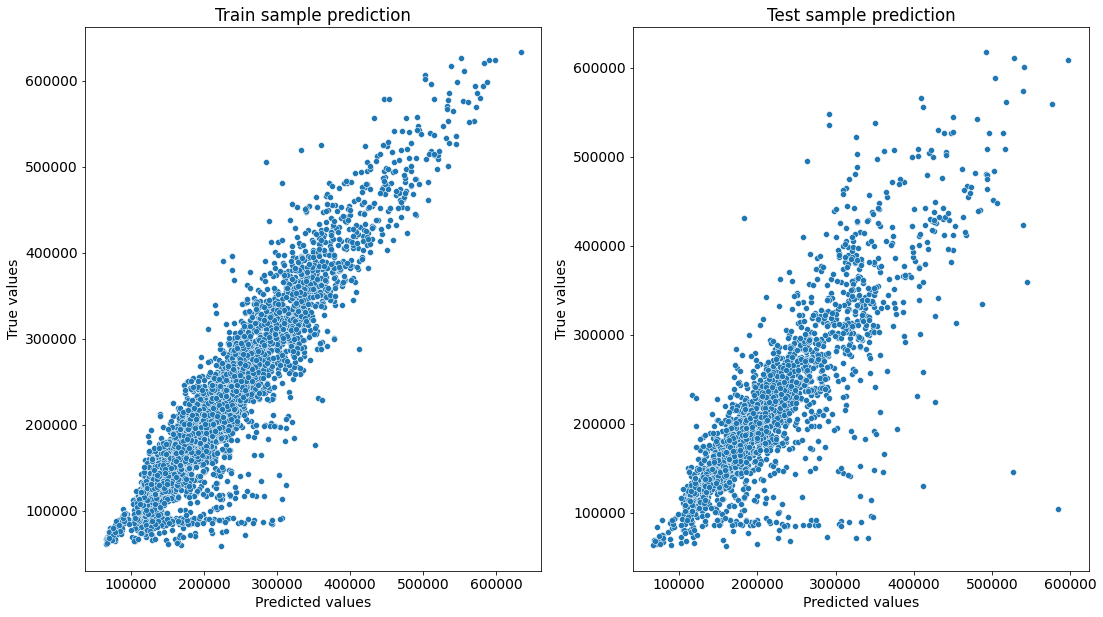

In [87]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [88]:
cv_score = cross_val_score(regr, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=45))
cv_score

array([0.70191045, 0.7402168 , 0.73380517, 0.73734497, 0.69922329])

### Extra Trees Regressor

In [89]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
extra_tree = ExtraTreeRegressor(random_state=42)
reg = BaggingRegressor(extra_tree, random_state=22).fit(X_train, y_train)

In [90]:
y_pred_train = regr.predict(X_train)
y_pred = regr.predict(X_test)

Train R2:	0.87
Valid R2:	0.72


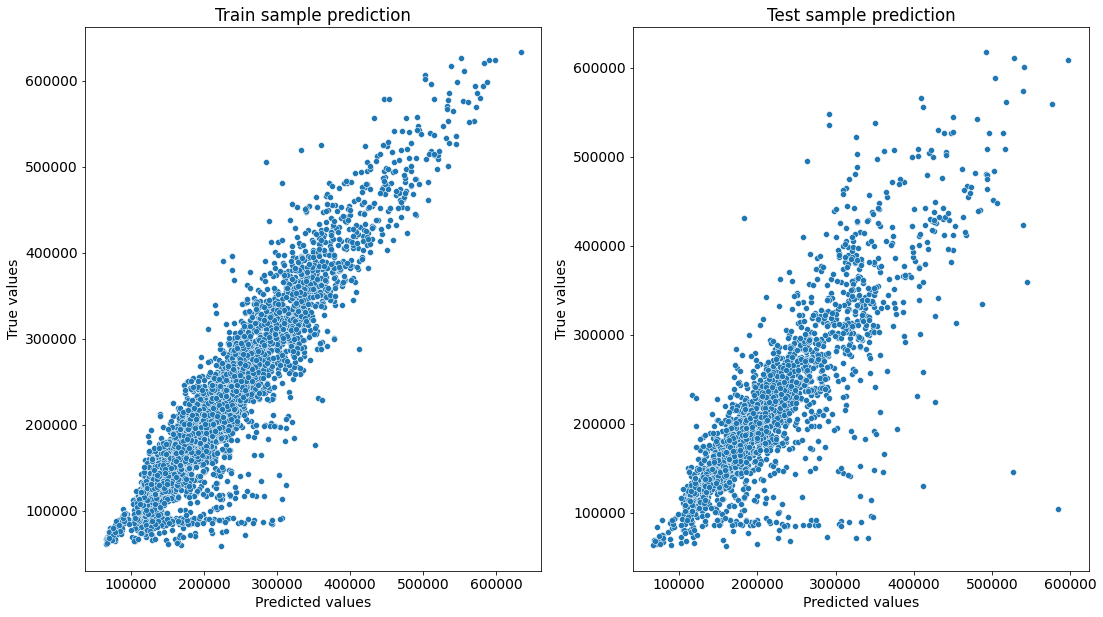

In [91]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [92]:
cv_score = cross_val_score(regr, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=45))
cv_score

array([0.70191045, 0.7402168 , 0.73380517, 0.73734497, 0.69922329])

### Passive Aggressive Regressor

In [93]:
from sklearn.linear_model import PassiveAggressiveRegressor
regr = PassiveAggressiveRegressor(max_iter=100000, random_state=45, tol=1e-3).fit(X_train, y_train)

In [94]:
y_pred_train = regr.predict(X_train)
y_pred = regr.predict(X_test)

Train R2:	0.618
Valid R2:	0.634


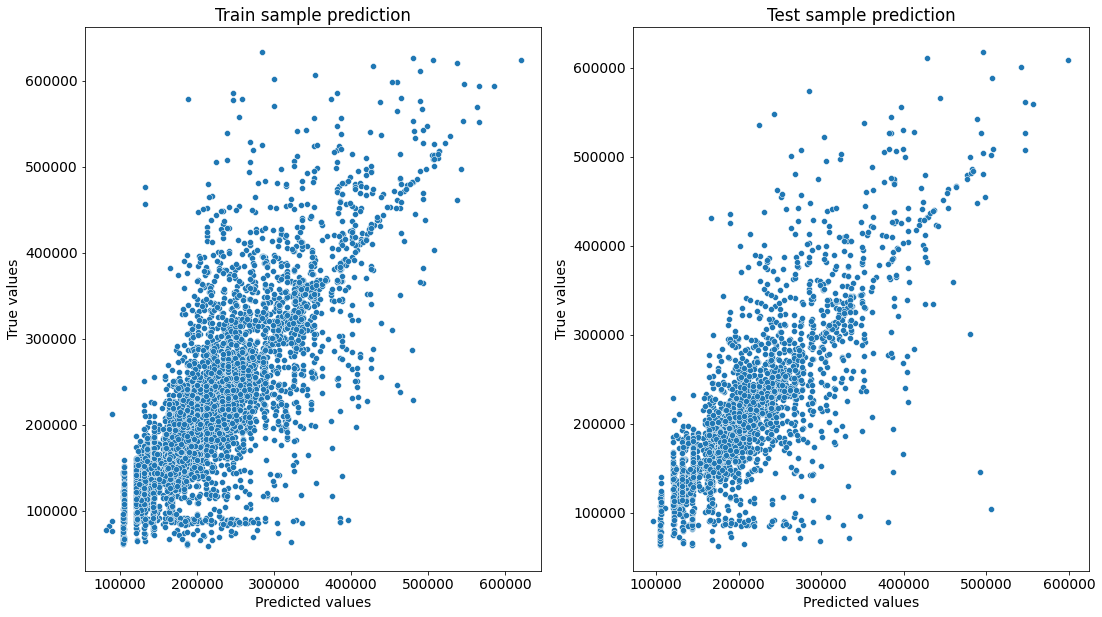

In [95]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [96]:
cv_score = cross_val_score(reg, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=45))
cv_score

array([0.71546099, 0.7302437 , 0.73270822, 0.72838966, 0.68821863])

### Gradient Boosting Regressor

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(random_state=45, n_estimators=322).fit(X_train, y_train)

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(random_state=42, n_estimators=322).fit(X_train, y_train)

Train R2:	0.618
Valid R2:	0.634


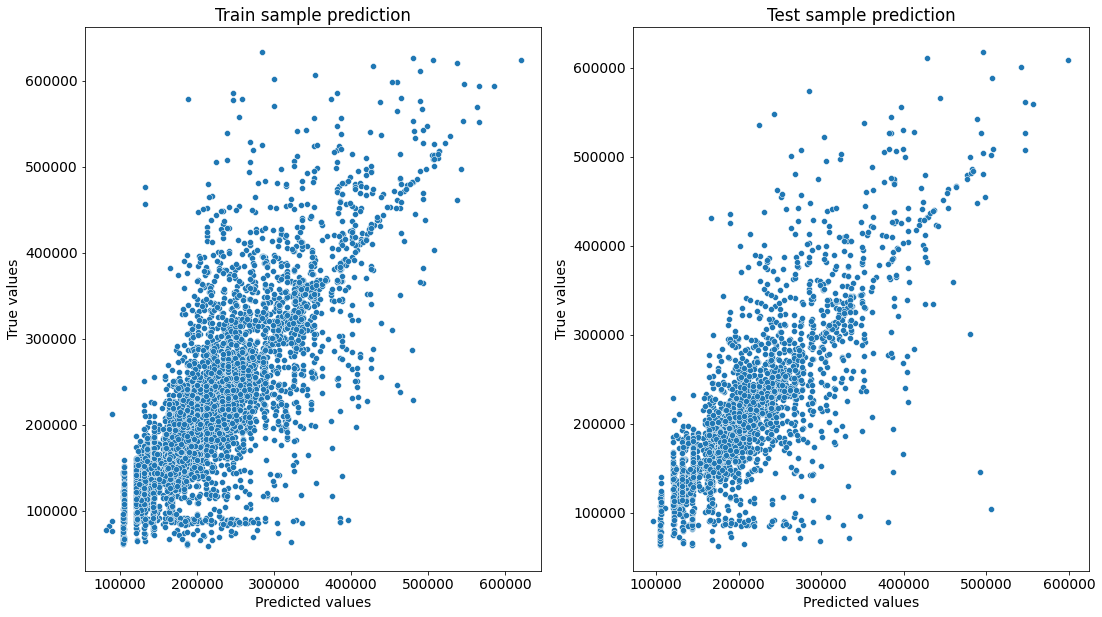

In [99]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [100]:
cv_score = cross_val_score(gbt, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=45))
cv_score

array([0.73308509, 0.75350192, 0.76514312, 0.74163382, 0.72855451])

### RANSAC Regressor

In [101]:
from sklearn.linear_model import RANSACRegressor
reg = RANSACRegressor(random_state=42).fit(X_train, y_train)

In [102]:
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

Train R2:	0.65
Valid R2:	0.654


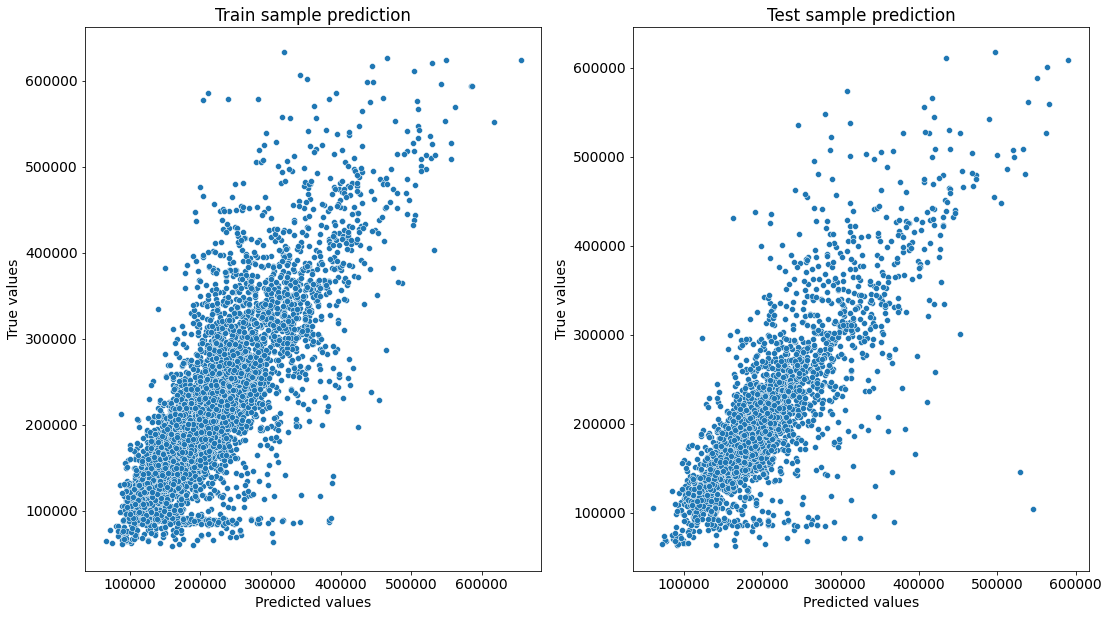

In [103]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [104]:
cv_score = cross_val_score(reg, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=25))
cv_score

array([0.61815575, 0.67033988, 0.62858868, 0.65499244, 0.65687256])

### Huber Regressor

In [105]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(alpha=100).fit(X_train, y_train)

In [106]:
y_pred_train = huber.predict(X_train)
y_pred = huber.predict(X_test)

Train R2:	0.617
Valid R2:	0.633


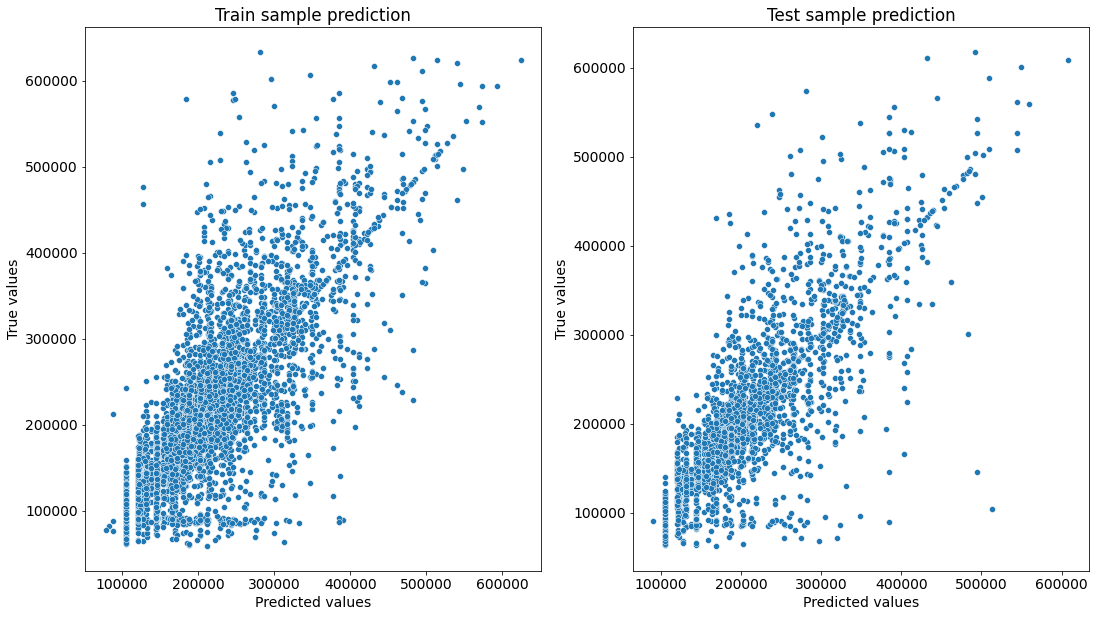

In [107]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [108]:
cv_score = cross_val_score(huber, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=25))
cv_score

array([0.61659052, 0.65028961, 0.62035774, 0.63421076, 0.59576938])

### SGD Regressor

In [109]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(penalty='elasticnet', alpha=0.0001, l1_ratio=0.25, tol=1e-4).fit(X_train, y_train)

In [110]:
y_pred_train = sgdr.predict(X_train)
y_pred = sgdr.predict(X_test)

Train R2:	-4.5561617122538644e+27
Valid R2:	-4.562865781088837e+27


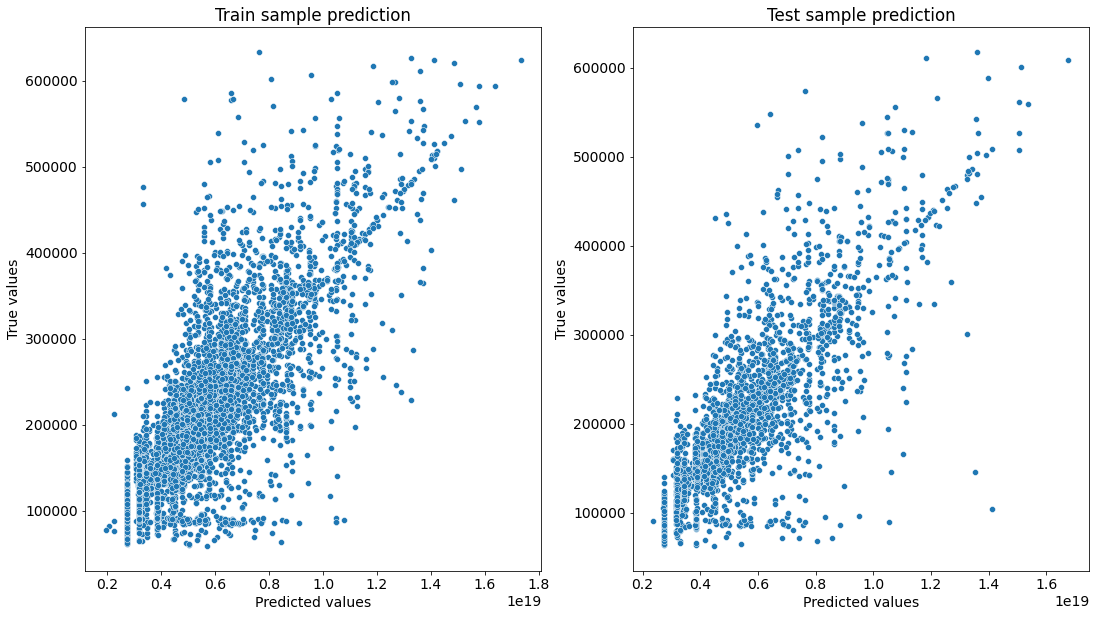

In [111]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [112]:
cv_score = cross_val_score(sgdr, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=25))
cv_score

array([-1.92498706e+28, -6.86144434e+25, -5.37274893e+27, -3.30861484e+28,
       -8.20403187e+26])

### SVR

In [113]:
from sklearn.svm import SVR
clf = SVR(C=55, epsilon=0.0001, gamma ='auto').fit(X_train, y_train)

In [114]:
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

Train R2:	-0.051
Valid R2:	-0.036


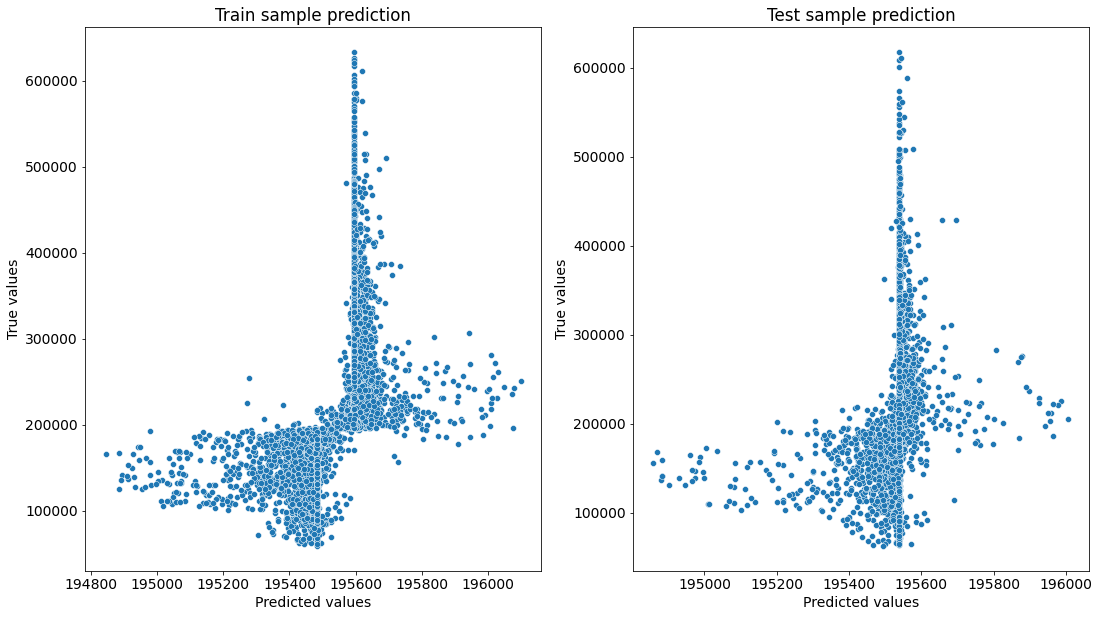

In [115]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [116]:
cv_score = cross_val_score(clf, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=45))
cv_score

array([-0.04246825, -0.04590699, -0.08023548, -0.05485064, -0.04515246])

### Multi-layer Perceptron regressor

In [117]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(hidden_layer_sizes=220, 
                    alpha = 0.0001, 
                    activation = 'logistic', 
                    random_state = 45).fit(X_train, y_train)

In [118]:
y_pred_train = mlpr.predict(X_train)
y_pred = mlpr.predict(X_test)

Train R2:	-5.714
Valid R2:	-5.592


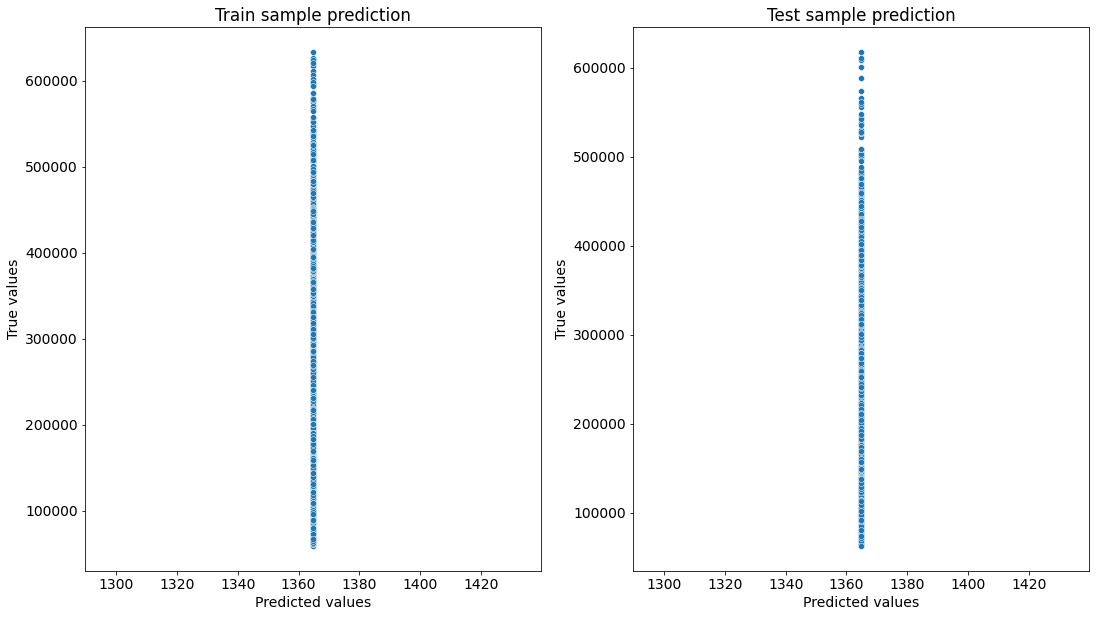

In [119]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

In [120]:
cv_score = cross_val_score(mlpr, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=25))
cv_score

array([-5.82889796, -5.41765955, -5.8499109 , -5.63156397, -5.64344906])

### Предсказание цен на тестовой выборке

In [121]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [122]:
test_df_prep = test_df.copy()
test_df_prep

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


#### Заполнение пропусков

In [123]:
LifeSquare_mean = test_df_prep["LifeSquare"].mean()
test_df_prep["LifeSquare"].fillna(LifeSquare_mean, inplace=True)
test_df_prep.loc[test_df_prep['LifeSquare'] < 8, 'LifeSquare'] = 8

In [124]:
test_df_prep.loc[test_df_prep['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df_prep['Healthcare_1'].median()

In [125]:
test_df_prep.loc[test_df_prep['KitchenSquare'] < 5, 'KitchenSquare'] = 5

In [126]:
test_df_prep

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,900.0,0,0,B
1,15856,74,2.0,69.263183,36.158810,5.0,6,1.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,900.0,3,3,B
4,14275,27,1.0,47.527111,43.387569,5.0,17,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,900.0,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,900.0,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,900.0,5,15,B
4998,4780,62,2.0,81.305222,36.158810,5.0,4,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A


In [127]:
# В случае когда общ.площадь меньше площади кухни + жилой + коридор санузел
test_df_prep.loc[test_df_prep['Square'] <= (test_df_prep['LifeSquare'] + test_df_prep['KitchenSquare'] + 6), 'Square'] = 1.0

In [128]:
test_df_prep

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,900.0,0,0,B
1,15856,74,2.0,69.263183,36.158810,5.0,6,1.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B
2,5480,190,1.0,1.000000,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,900.0,3,3,B
4,14275,27,1.0,1.000000,43.387569,5.0,17,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,900.0,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,900.0,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,900.0,5,15,B
4998,4780,62,2.0,81.305222,36.158810,5.0,4,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A


In [129]:
test_df_prep.loc[test_df_prep['Square'] == 1.0, 'Square'] = (test_df_prep['LifeSquare'] + test_df_prep['KitchenSquare'] + 6)

In [130]:
test_df_prep

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,900.0,0,0,B
1,15856,74,2.0,69.263183,36.158810,5.0,6,1.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B
2,5480,190,1.0,33.948246,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,900.0,3,3,B
4,14275,27,1.0,54.387569,43.387569,5.0,17,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,900.0,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,900.0,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,900.0,5,15,B
4998,4780,62,2.0,81.305222,36.158810,5.0,4,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A


In [131]:
print(test_df_prep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [132]:
category_A_B_map =  { 'A': 0,
                      'B': 1,}

test_df_prep['Ecology_2'] = test_df_prep['Ecology_2'].map(category_A_B_map)
test_df_prep['Ecology_3'] = test_df_prep['Ecology_3'].map(category_A_B_map)
test_df_prep['Shops_2'] = test_df_prep['Shops_2'].map(category_A_B_map)

print("Уникальные значения признака Ecology_2:\n{}".format(test_df_prep['Ecology_2'].unique()))
print("Уникальные значения признака Ecology_3:\n{}".format(test_df_prep['Ecology_3'].unique()))
print("Уникальные значения признака Shops_2:\n{}".format(test_df_prep['Shops_2'].unique()))

Уникальные значения признака Ecology_2:
[1 0]
Уникальные значения признака Ecology_3:
[1 0]
Уникальные значения признака Shops_2:
[1 0]


In [133]:
test_df_prep.keys()

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

In [134]:
feature_names = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2']

In [135]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=20, random_state=45)
test_df_for_scaling = scaler.fit_transform(test_df_prep.astype(float))

test_df_scaled = pd.DataFrame(test_df_for_scaling, columns=feature_names)

test_df_scaled.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,0.041530,0.642105,0.552632,0.420993,0.411684,0.500000,0.394737,0.526316,0.228070,0.899710,1.0,1.0,0.278195,0.298942,0.368421,0.500000,0.000000,0.000000,1.0
1,0.941790,0.736842,0.552632,0.752236,0.578947,0.000000,0.394737,0.052632,0.421053,0.526316,1.0,1.0,0.223684,0.200227,0.605263,0.500000,0.000000,0.394737,1.0
2,0.323900,0.983918,0.184211,0.048332,0.040134,0.947455,0.052632,0.157895,0.000993,0.000000,1.0,1.0,0.605263,0.772419,0.972136,0.996493,0.973684,0.684211,1.0
3,0.931278,0.546053,0.552632,0.782871,0.890770,0.763158,0.950045,0.894737,0.807018,0.581420,1.0,1.0,0.447368,0.412122,0.605263,0.500000,0.842105,0.500000,1.0
4,0.853027,0.368421,0.184211,0.500629,0.774374,0.000000,0.912281,0.763158,0.960526,0.473684,1.0,1.0,0.105263,0.105263,0.368421,0.500000,0.000000,0.000000,0.0


### Подготовка выборки

In [145]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2']

In [146]:
X = test_df_scaled[feature_names]

In [147]:
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,0.642105,0.552632,0.420993,0.411684,0.500000,0.394737,0.526316,0.228070,0.899710,1.0,1.0,0.278195,0.298942,0.368421,0.500000,0.000000,0.000000,1.0
1,0.736842,0.552632,0.752236,0.578947,0.000000,0.394737,0.052632,0.421053,0.526316,1.0,1.0,0.223684,0.200227,0.605263,0.500000,0.000000,0.394737,1.0
2,0.983918,0.184211,0.048332,0.040134,0.947455,0.052632,0.157895,0.000993,0.000000,1.0,1.0,0.605263,0.772419,0.972136,0.996493,0.973684,0.684211,1.0
3,0.546053,0.552632,0.782871,0.890770,0.763158,0.950045,0.894737,0.807018,0.581420,1.0,1.0,0.447368,0.412122,0.605263,0.500000,0.842105,0.500000,1.0
4,0.368421,0.184211,0.500629,0.774374,0.000000,0.912281,0.763158,0.960526,0.473684,1.0,1.0,0.105263,0.105263,0.368421,0.500000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.197368,0.868421,0.732568,0.878556,0.500000,0.289474,0.315789,0.245614,0.061603,1.0,1.0,0.754386,0.607605,0.000000,0.500000,0.526316,0.289474,1.0
4996,0.052632,0.184211,0.150543,0.150942,0.868421,0.736842,0.763158,0.960526,0.157895,1.0,1.0,0.052632,0.052632,0.000000,0.500000,0.000000,0.289474,1.0
4997,0.210526,0.868421,0.839694,0.851263,0.763158,0.950937,0.894737,0.676692,0.558352,1.0,1.0,1.000000,1.000000,0.500000,0.500000,0.973684,0.947368,1.0
4998,0.684211,0.552632,0.881640,0.578947,0.000000,0.184211,0.000000,0.421053,0.473684,1.0,1.0,0.105263,0.105263,0.368421,0.500000,0.000000,0.000000,0.0


In [154]:
y_pred = lasso.predict(X)
y_pred

array([182600.34114353, 177428.32371475, 167959.38545414, ...,
       197579.12911854, 175604.73353625, 185600.12229781])

In [155]:
predictions = pd.DataFrame({
    'Id': test_df['Id'],
    'Price':y_pred
})

In [156]:
predictions.head()

,Id,Price
0,725,182600.341144
1,15856,177428.323715
2,5480,167959.385454
3,15664,182664.735308
4,14275,181195.526783


In [157]:
predictions.tail()

,Id,Price
4995,8180,191680.662661
4996,4695,189121.177295
4997,5783,197579.129119
4998,4780,175604.733536
4999,12504,185600.122298


In [158]:
predictions.to_csv('Zakirov_Marat_predictions.csv', sep=',', index=False, encoding='utf-8')